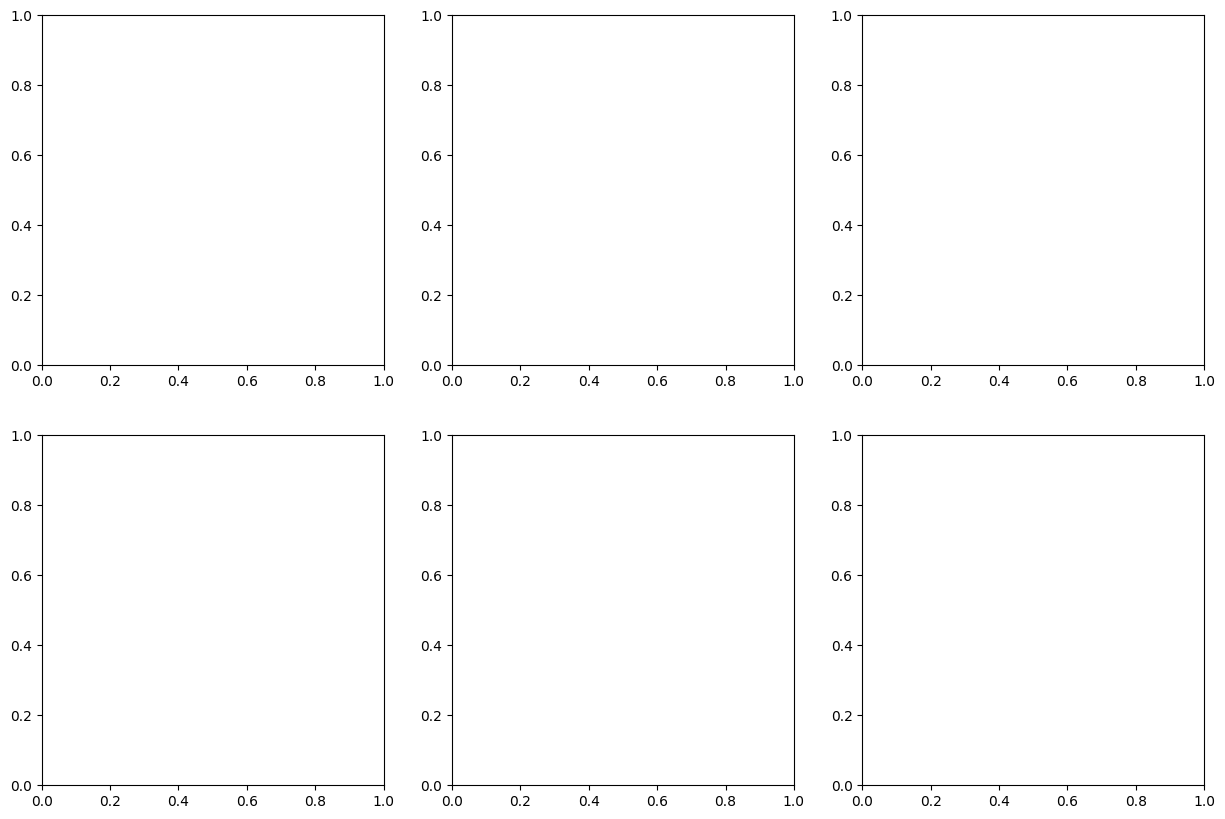

In [8]:
# Import necessary libraries
import os
import sys
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))
import pandas as pd
from load_data import fetch_data
from qoe_metrics import calculate_throughput,calculate_latency_qoe, categorize_qoe
from visualizations import plot_qoe_distribution
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [9]:

# SQL query to fetch data
query = "SELECT * FROM xdr_data ;"  

# Load the data
df = fetch_data(query)

d:\Kifya_training\Week 2\Telecom-User-Analysis-and-Dashboard-Development\scripts\load_data.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [10]:

# Apply the modularized function to calculate throughput
df = calculate_throughput(df)
# Inspect the result
df[['Bearer Id', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Total Throughput (kbps)']].head()

,Bearer Id,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total Throughput (kbps)
0,1.311448e+19,23.0,44.0,67.0
1,1.311448e+19,16.0,26.0,42.0
2,1.311448e+19,6.0,9.0,15.0
3,1.311448e+19,44.0,44.0,88.0
4,1.311448e+19,6.0,9.0,15.0


In [13]:
# Apply the modularized function to calculate latency QoE
df = calculate_latency_qoe(df)
# Inspect the result
df[['Bearer Id', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Overall Avg RTT (ms)']].head()


,Bearer Id,Avg RTT DL (ms),Avg RTT UL (ms),Overall Avg RTT (ms)
0,1.311448e+19,42.0,5.0,23.5
1,1.311448e+19,65.0,5.0,35.0
2,1.311448e+19,45.0,5.0,25.0
3,1.311448e+19,45.0,5.0,25.0
4,1.311448e+19,45.0,5.0,25.0


In [15]:
# Apply QoE categorization
df = categorize_qoe(df)

# Display the first few rows with the new QoE Category
df[['Bearer Id', 'Overall Avg RTT (ms)', 'QoE Category']].head()

,Bearer Id,Overall Avg RTT (ms),QoE Category
0,1.311448e+19,23.5,Excellent
1,1.311448e+19,35.0,Excellent
2,1.311448e+19,25.0,Excellent
3,1.311448e+19,25.0,Excellent
4,1.311448e+19,25.0,Excellent


In [16]:
# Count occurrences of each QoE category
qoe_distribution = df['QoE Category'].value_counts()

print("QoE Distribution:")
print(qoe_distribution)


QoE Distribution:
QoE Category
Excellent    122710
Good          16220
Fair           6323
Poor           4748
Name: count, dtype: int64


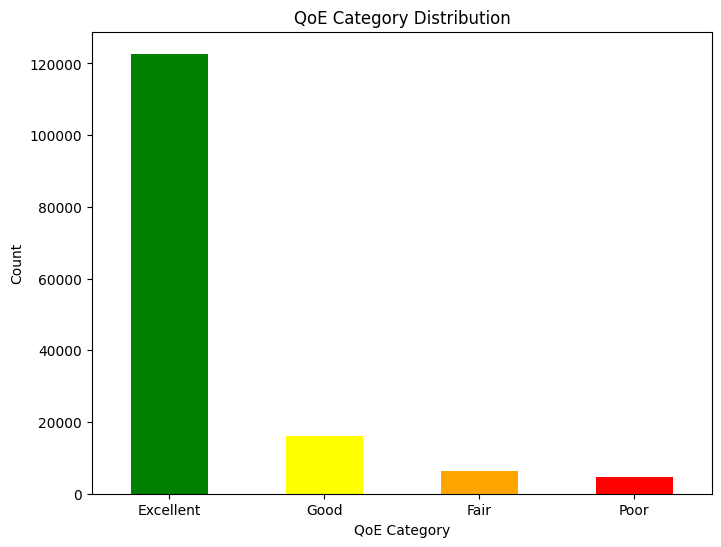

In [17]:
#plot_qoe_distribution
plot_qoe_distribution(df)
